<a href="https://colab.research.google.com/github/Rotem2411/alephBERTgimmelDalet/blob/main/word_embedding3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import nltk
from gensim import corpora
from collections import defaultdict
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
file_path = 'sentiments.csv'
df = pd.read_csv(file_path)

In [8]:
docs = df['text'].tolist()
tokenized_text = [nltk.word_tokenize(text) for text in docs]
dictionary = corpora.Dictionary(tokenized_text)
print("Num. of words in the dictionary:", len(dictionary))

Num. of words in the dictionary: 106919


Convert words to embeddings without text cleaning, using Word2Vec model

In [9]:
model = Word2Vec(tokenized_text, min_count=5, vector_size=100, window=5)

Example of most similar words to 'נתניהו'

In [10]:
display(pd.DataFrame(model.wv.most_similar('נתניהו', topn=10), columns=['Word', 'Similarity']))

,Word,Similarity
0,הליכוד,0.925071
1,בנט,0.899581
2,ביבי,0.896599
3,גנץ,0.884429
4,לפיד,0.881985
5,ליברמן,0.881191
6,פוטין,0.868087
7,טראמפ,0.865691
8,האוצר,0.848186
9,העם,0.838697


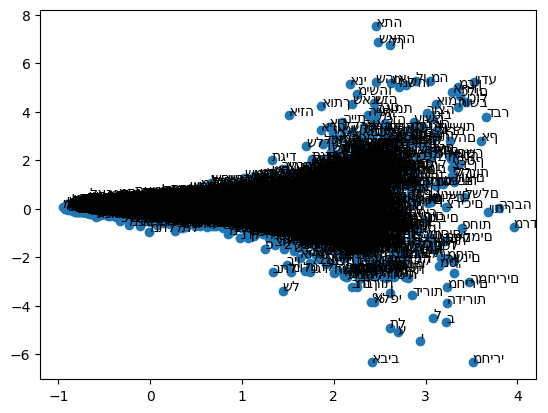

In [20]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
model = Word2Vec(tokenized_text, min_count=5, vector_size=100, window=5)
pca = PCA(n_components=2)
result = pca.fit_transform(model.wv.vectors)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
   pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Document Vectors from Word Embedding

In [5]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding
    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding
    Returns:
        List of document vectors
    """
    features = []
    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

vectorized_text = vectorize(tokenized_text, model=model)
len(vectorized_text), len(vectorized_text[0])

(75151, 100)

We start by generating the blobs of data to be clustered

In [6]:
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
N_Clusters = len(centers)
X, labels_true = make_blobs(n_samples=len(vectorized_text), centers=centers, cluster_std=0.7)

Compute clustering with KMeans

In [7]:
k_means = KMeans(n_clusters=N_Clusters, n_init='auto')
k_means.fit(X)

KMeans(n_clusters=4, n_init='auto')

Plotting the results

[]

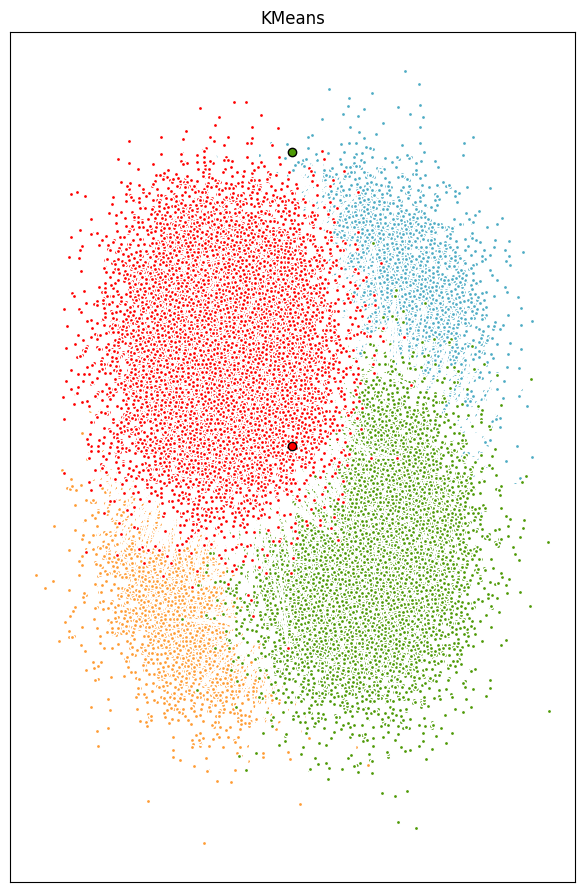

In [8]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06","#FF0000"]

ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(N_Clusters), colors):
    my_members = labels_true == k
    cluster_center = labels_true[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center,
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())

Reduce dimensionality to two dimensions using T-SNE

In [10]:
tsne = TSNE(n_components=2, perplexity=10, learning_rate='auto', n_iter=250, init='random').fit_transform(X)

Visualize t-SNE representations of the most common words

NameError: name 'cluster_ids' is not defined

Error in callback <function _draw_all_if_interactive at 0x798733229000> (for post_execute):


KeyboardInterrupt: 

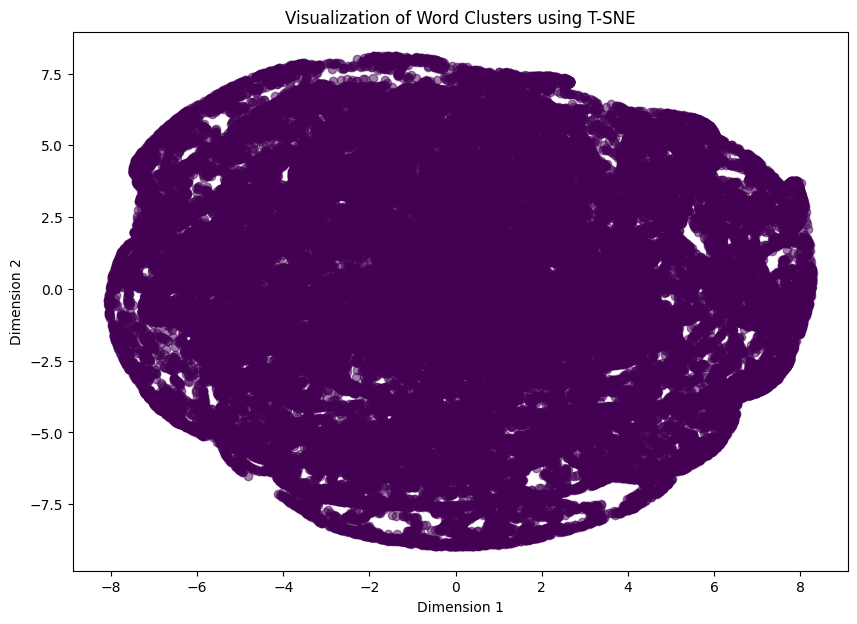

In [11]:
# prompt: Display on graph/plot the results based on the clustering performed in k-mins before

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(10, 7))
for i in range(len(tsne)):
  plt.scatter(tsne[i, 0], tsne[i, 1], c=k_means.labels_[i], alpha=0.5)
plt.title('Visualization of Word Clusters using T-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(cluster_ids)
plt.show()